In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.load("tidal_clean_data.npz")    # importing the step 1 data
x_data = data["x_data"]
y_data = data["y_data"]

In [11]:
def oscillatory_model(x, A, omega, phi, C): # defining the tide model for data fitting
    return A * np.sin(omega * x + phi) + C

sigma = 0.25                # this is the error in feet

p0 = [
    1.0,                    # 1 ft amplitude
    2 * np.pi/12.4,         # one cycle / 12.4 hours
    0.0,                    # phi is the phase shift and we're starting with zero phase
    np.mean(y_data)         # starting at the average tide height
]

popt, pcov = curve_fit(
    oscillatory_model,
    x_data,
    y_data,
    p0=p0,
    sigma=np.full_like(x_data, sigma),
    absolute_sigma=True
)

A_fit, omega_fit, phi_fit, C_fit = popt
print("Best Fit Parameters:", popt)

Best Fit Parameters: [3.25411372 0.31489963 5.60047671 2.57683605]


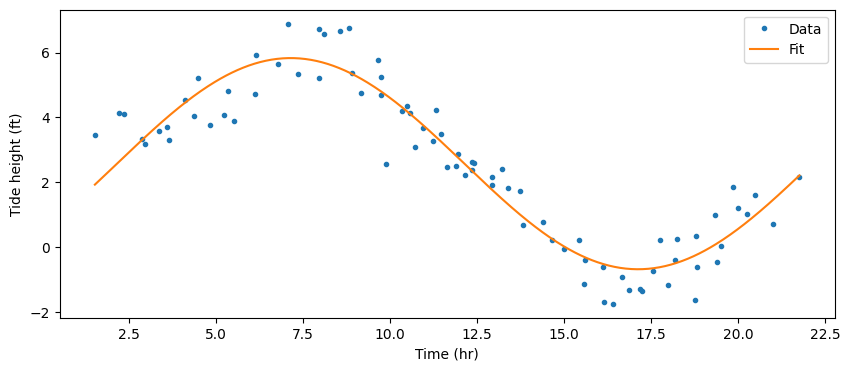

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(x_data, y_data, "o", markersize=3, label="Data")  # plotting data and fitted model
x_smooth = np.linspace(x_data.min(), x_data.max(), 500)
y_smooth = oscillatory_model(x_smooth, *popt)
plt.plot(x_smooth, y_smooth, label="Fit")
plt.xlabel("Time (hr)")
plt.ylabel("Tide height (ft)")
plt.legend()

# saving figure
plt.savefig("tide_model_fit.pdf", dpi=300)
plt.show()